In [1]:
# Import Numpy, TensorFlow, TFLearn, and MNIST data
import numpy as np
import tensorflow as tf
import tflearn
import tflearn.datasets.mnist as mnist

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


curses is not supported on this machine (please install/reinstall curses for an optimal experience)


In [2]:
# Retrieve the training and test data
trainX, trainY, testX, testY = mnist.load_data(one_hot=True)

Succesfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting mnist/train-images-idx3-ubyte.gz
Succesfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting mnist/train-labels-idx1-ubyte.gz
Succesfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting mnist/t10k-images-idx3-ubyte.gz
Succesfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting mnist/t10k-labels-idx1-ubyte.gz


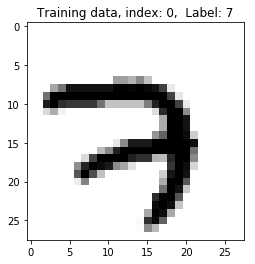

In [3]:
# Visualizing the data
import matplotlib.pyplot as plt
%matplotlib inline

# Function for displaying a training image by it's index in the MNIST set
def display_digit(index):
    label = trainY[index].argmax(axis=0)
    # Reshape 784 array into 28x28 image
    image = trainX[index].reshape([28,28])
    plt.title('Training data, index: %d,  Label: %d' % (index, label))
    plt.imshow(image, cmap='gray_r')
    plt.show()
    
# Display the first (index 0) training image
display_digit(0)

In [4]:
def build_model():
    # This resets all parameters and variables, leave this here
    tf.reset_default_graph()
    
    # Inputs
    net = tflearn.input_data([None, trainX.shape[1]])

    # Hidden layer(s)
    net = tflearn.fully_connected(net, 160, activation='ReLU')
    net = tflearn.fully_connected(net, 64, activation='ReLU')
    
    # Output layer and training model
    net = tflearn.fully_connected(net, 10, activation='softmax')
    net = tflearn.regression(net, optimizer='sgd', learning_rate=0.01, loss='categorical_crossentropy')
    
    model = tflearn.DNN(net)
    return model

In [5]:
model = build_model()

In [6]:
model.fit(trainX, trainY, validation_set=0.1, show_metric=True, batch_size=100, n_epoch=200)

Training Step: 98999  | total loss: 0.01171 | time: 3.499s
| SGD | epoch: 200 | loss: 0.01171 - acc: 0.9994 -- iter: 49400/49500
Training Step: 99000  | total loss: 0.01161 | time: 4.521s
| SGD | epoch: 200 | loss: 0.01161 - acc: 0.9995 | val_loss: 0.08786 - val_acc: 0.9767 -- iter: 49500/49500
--


In [7]:
predictions = np.array(model.predict(testX)).argmax(axis=1)

# Calculate the accuracy, which is the percentage of times the predicated labels matched the actual labels
actual = testY.argmax(axis=1)
test_accuracy = np.mean(predictions == actual, axis=0)

# Print out the result
print("Test accuracy: ", test_accuracy)

Test accuracy:  0.9758
